In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def fminmax(column):
    minx = column.min()
    maxx = column.max()
    return float(minx), float(maxx)

In [67]:
def normalise(data):
    for i in range(len(data[0])-1):
        minx, maxx = fminmax(data[:,i])
        for j in range(data.shape[0]):
            data[j][i] = (data[j][i] - minx)/(maxx - minx)
    return data

In [94]:
class NeuralNetwork:
    def __init__(self, n_hidden, nodes, n_output, n_epoch, l_rate=0.03, tol=1e-4):
        self.n_hidden = n_hidden
        self.nodes = nodes
        self.n_output = n_output
        self.n_epoch = n_epoch
        self.l_rate = l_rate
        self.tol = tol
        self.loss = []
        self.accuracy = []
        
    def fit(self,x,y):
        self.X = x
        self.weights_h1 = np.random.rand(self.X.shape[1], self.nodes)
        self.weights_h2 = np.random.rand(self.nodes, self.nodes)
        self.weights_o = np.random.rand(self.nodes, self.n_output)

        self.bias_h1 = np.random.rand(1,self.nodes) 
        self.bias_h2 = np.random.rand(1,self.nodes)
        self.bias_o = np.random.rand(1,self.n_output)
        
        self.Y = y
        shap = (int(self.X.shape[0]), int(self.n_output))
        labels = np.zeros(shap)
        for i in range(int(self.X.shape[0])):
            labels[i][int(self.Y[i])-1] = 1
        self.y = labels
        self.loss = []
        self.accuracy = []
        for epoch in range(self.n_epoch):
            self._feedforward()
            self._backpropagation()
            loss = 0
            acc = 0
            if(epoch%50 == 0):
                loss = np.sum(-self.y * np.log(self.a3))
                #print("loss = ",loss)
                self.loss.append(loss)
                for i in range(len(self.Y)):
                    if (np.argmax(self.a3[i,:]) + 1) == self.Y[i]:
                        acc += 1
                accuracy = acc*100/len(self.Y)
                print("accuracy = ",accuracy,"---loss = ",loss,"---iter",epoch)
                self.accuracy.append(accuracy)
            
            if abs(self.y - self.a3).mean()<self.tol:
                break
                
    def _feedforward(self, X=None):
        
        if X is None:
            X=self.X

        z1 = np.dot(X, self.weights_h1) + self.bias_h1
        self.a1 = self._sigmoid(z1) 
        
        if self.n_hidden == 1:
            z2 = np.dot(self.a1, self.weights_o) + self.bias_o
            self.a3 = self._sigmoid(z2)
        
        else:
            z2 = np.dot(self.a1, self.weights_h2) + self.bias_h2
            self.a2 = self._sigmoid(z2)
            z3 = np.dot(self.a2, self.weights_o) + self.bias_o
            self.a3 = self._sigmoid(z3)
        
    def _sigmoid(self,z):
        return 1 / (1 + np.exp(-z))

    def _sigmoid_d(self, z):
        sd = np.exp(-z)/(1+np.exp(-z))**2
        return sd
    
    def _softmax(self,z):
        expA = np.exp(z)
        return expA / expA.sum(axis=1, keepdims=True)

    def _backpropagation(self):

        if self.n_hidden == 1:
            delta_L = self.y - self.a3

            small_delta_o = delta_L * self._sigmoid_d(self.a3) 
            big_delta_o = np.dot(self.a1.T, small_delta_o) 

            small_delta_h = np.dot(small_delta_o, self.weights_o.T) * self._sigmoid_d(self.a1) 
            big_delta_h = np.dot(self.X.T, small_delta_h)

            self.weights_h1 = self.weights_h1 + self.l_rate*big_delta_h
            self.weights_o = self.weights_o + self.l_rate*big_delta_o
            self.bias_h1 = self.bias_h1 + self.l_rate*np.sum(small_delta_h, axis=0)
            self.bias_o = self.bias_o + self.l_rate*np.sum(small_delta_o, axis=0)
            
        else:
            delta_L = self.y - self.a3
       
            small_delta_o = delta_L * self._sigmoid_d(self.a3) 
            big_delta_o = np.dot(self.a2.T, small_delta_o)

            small_delta_h2 = np.dot(small_delta_o, self.weights_o.T) * self._sigmoid_d(self.a2) 
            big_delta_h2 = np.dot(self.a1.T, small_delta_h2)

            small_delta_h1 = np.dot(small_delta_h2, self.weights_h2.T) * self._sigmoid_d(self.a1)
            big_delta_h1 = np.dot(self.X.T, small_delta_h1)

            self.weights_h1 = self.weights_h1 + self.l_rate*big_delta_h1
            self.weights_h2 = self.weights_h2 + self.l_rate*big_delta_h2
            self.weights_o = self.weights_o + self.l_rate*big_delta_o
            
            self.bias_h2 = self.bias_h2 + self.l_rate*np.sum(small_delta_h2, axis=0)
            self.bias_h1 = self.bias_h1 + self.l_rate*np.sum(small_delta_h1, axis=0)
            self.bias_o = self.bias_o + self.l_rate*np.sum(small_delta_o, axis=0)           

    def plota(self):
        ite = [i*50 for i in range(int(self.n_epoch/50))]
        plot1 = plt.figure(1)
        plt.plot(ite,self.accuracy,'b')
        plt.title("Accuracy")
        return 0
    
    def plotl(self):
        ite = [i*50 for i in range(int(self.n_epoch/50))]
        plot1 = plt.figure(2)
        plt.plot(ite,self.loss,'r')
        plt.title("Loss")
        return 0    
    
    def predict(self, X):
        self._feedforward(X)
        pred_val = []
        for i in range(X.shape[0]):
            pred_val.append(int(np.argmax(self.a3[i,:]+0.5) + 1))
        return pred_val
    
    def outr(self):
        a3 = self.a3
        return a3

In [95]:
data = pd.read_csv("dataset_NN.csv", header=None, skiprows = 1)

dataset = np.array(data)
dataset = normalise(dataset) # normalised the data
np.random.shuffle(dataset)
#print(dataset)

In [187]:
rows = dataset.shape[0]
clmns = dataset.shape[1]
classes = np.unique(dataset[:,-1]).shape[0]
t_v = int(rows*0.7)

X_train = dataset[:t_v,:-1]
Y_train = dataset[:t_v,-1]
X_test = dataset[t_v:,:-1]
Y_test = dataset[t_v:,-1]


net1=NeuralNetwork(n_hidden=1, nodes=100, n_output=10, n_epoch=10000, l_rate=0.005)
net2=NeuralNetwork(n_hidden=1, nodes=100, n_output=10, n_epoch=10000, l_rate=0.001)
net3=NeuralNetwork(n_hidden=1, nodes=100, n_output=10, n_epoch=10000, l_rate=0.0005)

net1.fit(X_train,Y_train)
net2.fit(X_train,Y_train)
net3.fit(X_train,Y_train)



accuracy =  2.5 ---loss =  8.615330671091217e-14 ---iter 0
accuracy =  55.57142857142857 ---loss =  2342.327497622029 ---iter 50
accuracy =  63.214285714285715 ---loss =  1966.6764370174171 ---iter 100
accuracy =  66.5 ---loss =  1723.7340079995433 ---iter 150
accuracy =  68.28571428571429 ---loss =  1568.679635045311 ---iter 200
accuracy =  69.07142857142857 ---loss =  1469.17239103572 ---iter 250
accuracy =  69.21428571428571 ---loss =  1402.1576413322555 ---iter 300
accuracy =  69.42857142857143 ---loss =  1353.5578594100725 ---iter 350
accuracy =  69.78571428571429 ---loss =  1315.777528861912 ---iter 400
accuracy =  69.71428571428571 ---loss =  1284.7898183144448 ---iter 450
accuracy =  69.78571428571429 ---loss =  1258.3175861987575 ---iter 500
accuracy =  70.21428571428571 ---loss =  1234.9873112438115 ---iter 550
accuracy =  70.21428571428571 ---loss =  1213.9579933536115 ---iter 600
accuracy =  70.21428571428571 ---loss =  1194.7284031858 ---iter 650
accuracy =  70.42857142857

In [188]:
y_pred=net1.predict(X_test)
acc = 0
accu, lossu = [], []
for i in range(len(Y_test)):
    if y_pred[i] == Y_test[i]:
        acc += 1
accuracy = acc*100/len(Y_test)
print(accuracy)
accu.append(accuracy)

72.5


In [189]:
a3 = net1.outr()
loss = 0
for i in range(len(Y_test)):
    loss += Y_test[i] * np.sum(a3[i])
print(loss)
lossu.append(loss)

3220.677773719641


In [190]:
y_pred=net2.predict(X_test)
acc = 0
for i in range(len(Y_test)):
    if y_pred[i] == Y_test[i]:
        acc += 1
accuracy = acc*100/len(Y_test)
print(accuracy)
accu.append(accuracy)

73.5


In [191]:
a3 = net2.outr()
loss = 0
for i in range(len(Y_test)):
    loss += Y_test[i] * np.sum(a3[i])
print(loss)
lossu.append(loss)

3222.207909126015


In [192]:
y_pred=net3.predict(X_test)
acc = 0
for i in range(len(Y_test)):
    if y_pred[i] == Y_test[i]:
        acc += 1
accuracy = acc*100/len(Y_test)
print(accuracy)
accu.append(accuracy)

71.66666666666667


In [193]:
a3 = net3.outr()
loss = 0
for i in range(len(Y_test)):
    loss += Y_test[i] * np.sum(a3[i])
print(loss)
lossu.append(loss)

3044.07633593912


Text(0.5, 1.0, 'Loss vs Lr')

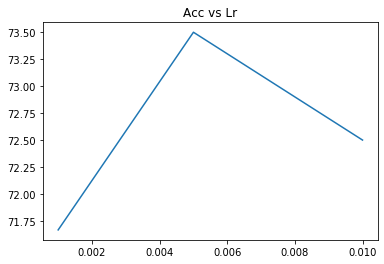

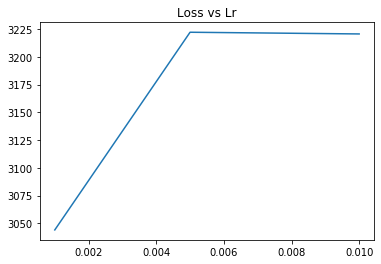

In [194]:
lr = [0.01, 0.005, 0.001]
plt.figure(1)
plt.plot(lr,accu)
plt.title("Acc vs Lr")
plt.figure(2)
plt.plot(lr,lossu)
plt.title("Loss vs Lr")

0

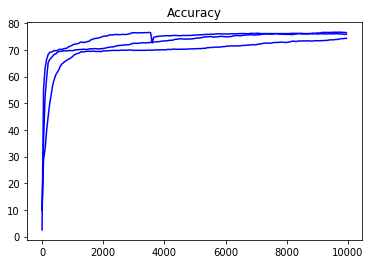

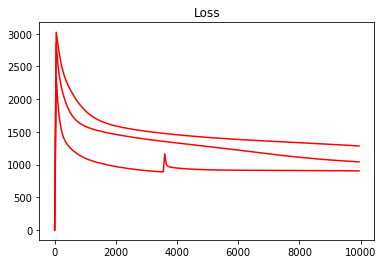

In [195]:
net1.plota()
net1.plotl()
net2.plota()
net2.plotl()
net3.plota()
net3.plotl()